In [252]:
import cx_Oracle
import re
import pandas as pd
import numpy as np
from konlpy.tag import Kkma, Komoran, Okt, Hannanum
import matplotlib.pyplot as plt

In [2]:
#db연결-----------------------------------------------------------------------------------------------------------------------
cx_Oracle.init_oracle_client(lib_dir=r"C:\instantclient-basic-windows.x64-21.9.0.0.0dbru\instantclient_21_9")
#-----------------------------------------------------------------------------------------------------------------------------

In [3]:
#sql문으로 db에서 값 가져오기
def make_df(sql):
    conn = cx_Oracle.connect(user='admin', password='Tongbrown@23', dsn='tongbrown_high')
    cs = conn.cursor()
    sql = sql
    cs.execute(sql)
    row = cs.fetchall()
    colname = cs.description
    col = []
    for i in colname:
        col.append(i[0])
    df =  pd.DataFrame(row,columns = col)
    return df

In [149]:
#리스트 파악용 함수
def info(a,n=10):
    n = int(n)
    print('길이 : ', len(a))
    print('유형 : ', type(nd_det_list))
    print(f'값({n}) : ', a[:n])

In [108]:
#테이블 가져와서 DataFrame 만들기
script_df = make_df('select * from det_script')

In [109]:
#Detail Keyword 목록 중복없이 가져오기
det_list = list(script_df['DET_K'])
nd_det_list = list(set(det_list))

In [151]:
info(nd_det_list)

길이 :  40
유형 :  <class 'list'>
값(10) :  ['골프 헤드 스피드', '골프 연습 전', '골프 파크 스윙', '골프 힘 다운', '은행 대출 전세', '은행 리플 수단', '은행 제주 무상증자', '골프 편 거리', '은행 코인 화폐', '은행 리그 농협카드']


In [16]:
#일단 하나로 테스트
nd_det_list[0]

'골프 헤드 스피드'

In [111]:
#원하는 키워드의 script 가져오기
script0 = script_df[script_df['DET_K']==nd_det_list[0]]
sc0_list = list(script0['SCRIPT'])

In [152]:
info(sc0_list,5)

길이 :  11657
유형 :  <class 'list'>
값(5) :  ['그것도', '막 여기까지가 아니고', '딱 내가 편한 데까지 거의', '여기까지예요 한 1m 되려나 1m 안', '되겠죠 한']


In [113]:
#Okt 선언
okt = Okt()

In [114]:
#Okt의 morphs를 통해 키워드 추출
keyword_list = []
for i in range(len(sc0_list)):
    text = sc0_list[i]
    keyword = okt.morphs(text, stem= True)
    keyword_list.append(keyword)

In [153]:
info(keyword_list)

길이 :  11657
유형 :  <class 'list'>
값(10) :  [['그것', '도'], ['막', '여기', '까지가', '아니다'], ['딱', '내', '가', '편하다', '데', '까지', '거의'], ['여기', '까지', '예요', '하다', '1', 'm', '되다', '1', 'm', '안'], ['되다', '하다'], ['70', 'cm', '여기', '까지', '그', '다음', '이렇게'], ['이렇게'], ['이', '게', '첫', '번', '째', '이다'], ['두', '번째', '다', '똑같다', '이렇다'], ['자']]


In [117]:
#2차원 리스트를 1차원 리스트로
key_list = sum(keyword_list, [])

In [157]:
info(key_list,15)

길이 :  61235
유형 :  <class 'list'>
값(15) :  ['그것', '도', '막', '여기', '까지가', '아니다', '딱', '내', '가', '편하다', '데', '까지', '거의', '여기', '까지']


In [119]:
#추출된 키워드 목록 생성
nd_k_list = list(set(key_list))

In [229]:
#키워드 갯수 확인
keycount_list = []
for i in nd_k_list:
    keycount = key_list.count(i)
    keycount_list.append([i,keycount])

#형태는 DataFrame으로
keycount_df = pd.DataFrame(data = keycount_list, columns = ['keyword','count'])
#정렬
sort_key_df = keycount_df.sort_values('count',ascending = False)

In [230]:
sort_key_df.head(25)

,keyword,count
1483,이,2522
685,하다,2176
2145,을,1784
2061,가,1494
2728,이렇게,969
1036,에,951
742,거,888
323,있다,872
2790,를,854
519,되다,786


In [208]:
info(nd_k_list,30)

길이 :  3443
유형 :  <class 'list'>
값(30) :  ['의미', '뒤', '샌드', '협소해', '회전력', '슛', '가능하다', '지겹다', '76', '건의', 'over', 'means', '도우', '명인', '박스', '기도', '8만', '핫', '스핑', '러스트', '잡다', '권장', '제외', '굳어지다', 'folds', '임성재', '공도', '질감', '벽보', '역시']


In [207]:
info(keyword_list)

길이 :  11657
유형 :  <class 'list'>
값(10) :  [['그것', '도'], ['막', '여기', '까지가', '아니다'], ['딱', '내', '가', '편하다', '데', '까지', '거의'], ['여기', '까지', '예요', '하다', '1', 'm', '되다', '1', 'm', '안'], ['되다', '하다'], ['70', 'cm', '여기', '까지', '그', '다음', '이렇게'], ['이렇게'], ['이', '게', '첫', '번', '째', '이다'], ['두', '번째', '다', '똑같다', '이렇다'], ['자']]


In [209]:
kc = list(keycount_df['count'])

In [210]:
kc

[5,
 60,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 1,
 1,
 73,
 1,
 2,
 4,
 1,
 1,
 2,
 2,
 1,
 8,
 1,
 6,
 1,
 1,
 2,
 1,
 2,
 13,
 1,
 2,
 1,
 1,
 52,
 5,
 156,
 1,
 2,
 3,
 1,
 15,
 4,
 10,
 1,
 13,
 140,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 4,
 14,
 4,
 16,
 2,
 4,
 22,
 318,
 12,
 1,
 1,
 35,
 82,
 1,
 42,
 2,
 2,
 16,
 12,
 1,
 1,
 2,
 1,
 1,
 282,
 1,
 1,
 2,
 1,
 36,
 2,
 5,
 1,
 1,
 3,
 12,
 1,
 4,
 1,
 28,
 2,
 4,
 1,
 1,
 1,
 1,
 6,
 4,
 9,
 1,
 1,
 6,
 1,
 1,
 3,
 4,
 2,
 2,
 71,
 14,
 8,
 1,
 2,
 4,
 95,
 1,
 1,
 36,
 3,
 2,
 1,
 1,
 1,
 2,
 3,
 17,
 51,
 2,
 159,
 3,
 14,
 1,
 1,
 1,
 5,
 5,
 2,
 1,
 1,
 2,
 2,
 1,
 3,
 2,
 173,
 1,
 8,
 5,
 1,
 2,
 16,
 4,
 8,
 1,
 43,
 1,
 7,
 57,
 1,
 10,
 1,
 6,
 2,
 18,
 4,
 1,
 1,
 7,
 30,
 2,
 30,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 4,
 1,
 5,
 1,
 1,
 1,
 3,
 1,
 1,
 10,
 1,
 2,
 3,
 4,
 1,
 1,
 1,
 2,
 10,
 2,
 1,
 2,
 12,
 8,
 1,
 6,
 122,
 7,
 2,
 1,
 11,
 1,
 8,
 2,
 1,
 12,
 66,
 1,
 1,
 2,
 3,
 5,
 1,
 1,
 3,
 2,

In [213]:
import statistics as stt

In [250]:
#평균
kc_mean = stt.mean(kc)
print(kc_mean)

17.785361603252976


In [251]:
#모표준편차
kc_psd = stt.pstdev(kc)
print(kc_psd)

90.1768559266887


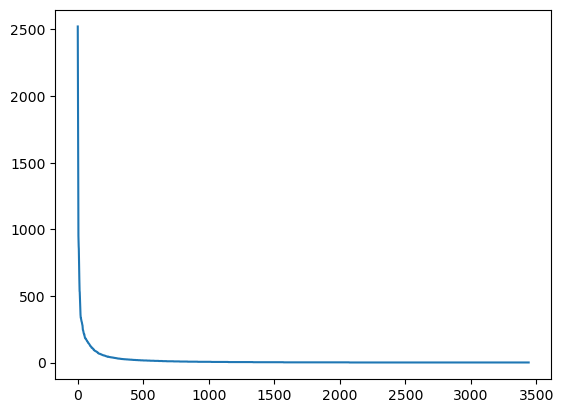

In [253]:
# 그래프로 형태 확인
xdata = list(range(0,3443,1))

ydata = list(stt_sk_df['count'])

plt.plot(xdata, ydata)
plt.show()

In [261]:
# 99.5%
kc_mean + kc_psd*2.576

250.08094247040307

In [255]:
stt_df = sort_key_df.copy()

In [263]:
a =stt_df[stt_df['count'] >= 250]

In [264]:
info(a)

길이 :  39
유형 :  <class 'list'>
값(10) :       keyword  count
1483       이   2522
685       하다   2176
2145       을   1784
2061       가   1494
2728     이렇게    969
1036       에    951
742        거    888
323       있다    872
2790       를    854
519       되다    786


In [284]:
info(key_vector_list)

길이 :  39
유형 :  <class 'list'>
값(10) :  ['이', '하다', '을', '가', '이렇게', '에', '거', '있다', '를', '되다']


In [272]:
info(key_vector,39)

길이 :  39
유형 :  <class 'list'>
값(39) :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [269]:
key_vector_list = list(a['keyword'])

In [262]:
key_vector = [0 for i in range(39)]

In [281]:
sc_sen = list(script0['SCRIPT'])

In [283]:
info(sc_sen)

길이 :  11657
유형 :  <class 'list'>
값(10) :  ['그것도', '막 여기까지가 아니고', '딱 내가 편한 데까지 거의', '여기까지예요 한 1m 되려나 1m 안', '되겠죠 한', '70cm 여기까지 그 다음 이렇게', '이렇게', '이게 첫 번째입니다', '두 번째 다 똑같아요 이렇게만', '자']


In [286]:
kec_count_matrix = []
for i in range(len(sc_sen)):
    key_vector = [0 for i in range(39)]
    for j in range(len(key_vector_list)):
        k = key_vector_list[j]
        ke_count = sc_sen[i].count(k)
        key_vector[j] = ke_count
    kec_count_matrix.append(key_vector)

In [288]:
kec_count_df = pd.DataFrame(data = kec_count_matrix, columns = key_vector_list)

In [290]:
kec_count_df.head(50)

,이,하다,을,가,이렇게,에,거,있다,를,되다,...,들,여기,수,클럽,좀,돼다,제,백,안,그래서
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
